### Import Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')


### Load Dataset

In [5]:
# Load the dataset
data_path = 'C:/Users/lourd/A6_Open Project/Data Sets/combined_fy2022_fy2023_data.xlsx'
data = pd.read_excel(data_path)


In [7]:
# Display the first few rows and basic information
data.head()
data.info()
data.columns.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614515 entries, 0 to 614514
Columns: 109 entries, Asset Height Range to Fiscal Year
dtypes: float64(20), int64(6), object(83)
memory usage: 511.0+ MB


array(['Asset Height Range', 'Lease Start Date',
       'Elevation Above Mean Sea Level', 'Acres', 'Asset Height',
       'Congressional District', 'Field Office Collocation',
       'Reporting Bureau Code', 'Replacement Value',
       'Real Property Use Code', 'Lease Annual Rent to Lessor',
       'Date Start of Underutilized', 'Lease Expiration Date',
       'Installation Id', 'Historical Status Code', 'Unit Of Measure',
       'Street Address', 'Number of Days Underutilized',
       'Field Office Collocation Code', 'Determine # of Contractors',
       'Reason Cannot Currently Be Disposed', 'Country Code',
       'Lease Authority', 'Excess Date', 'Sustainability Code',
       'Legal Interest Indicator', 'Longitude', 'Number of Days Surplus',
       'Country Name',
       'Owned and Otherwise Managed Annual Maintenance Cost',
       'Reduce the Footprint', 'Determine Number of Fed Employees Code',
       'Legal Interest Code', 'Square Feet Unit of Measure',
       'Owned and Otherwise

In [9]:
data.describe()

,Reporting Bureau Code,Real Property Use Code,Historical Status Code,Country Code,Sustainability Code,Longitude,Consecutive Years Underutilized,Reporting Agency Code,Reason Cannot Currently Be Disposed Code,Core-based Statistical Area Code,...,City Code,FOIA Exemption Code,Year of Construction,Statutory Citation,Latitude,Real Property Type Code,Unit Of Measure Code,County Code,Using Bureau Code,Fiscal Year
count,614515.000000,613564.000000,564449.000000,613564.000000,104705.000000,549001.000000,614515.000000,614515.000000,4391.000000,614515.000000,...,613547.000000,306964.000000,614515.000000,424.000000,549001.000000,613564.000000,99681.000000,610003.000000,208225.000000,614515.000000
mean,16.808867,53.043472,4.840712,837.434367,3.300138,-101.244361,0.077227,29.669847,5.232293,2108.494530,...,2080.649075,9.989142,1795.489573,6.542453,38.860276,35.649337,1.383313,76.617677,11.047064,2022.498832
std,12.955164,25.781719,0.982182,34.014892,0.905141,20.589539,0.965392,26.577377,2.496059,14276.938886,...,2214.610326,0.199431,1468.824759,0.589979,7.437315,6.352611,1.158025,121.349906,13.681423,0.499999
min,0.000000,1.000000,1.000000,4.000000,1.000000,-178.792790,0.000000,11.000000,1.000000,0.000000,...,2.000000,1.000000,0.000000,1.000000,-77.543400,20.000000,1.000000,0.000000,0.000000,2022.000000
25%,2.000000,29.000000,5.000000,840.000000,3.000000,-115.584494,0.000000,14.000000,4.000000,0.000000,...,520.000000,10.000000,1932.000000,6.000000,34.867619,35.000000,1.000000,19.000000,2.000000,2022.000000
50%,17.000000,66.000000,5.000000,840.000000,4.000000,-104.031285,0.000000,14.000000,7.000000,0.000000,...,1480.000000,10.000000,1968.000000,7.000000,38.737830,40.000000,1.000000,47.000000,5.000000,2022.000000
75%,23.000000,75.000000,5.000000,840.000000,4.000000,-84.368047,0.000000,47.000000,7.000000,0.000000,...,2686.000000,10.000000,1996.000000,7.000000,43.565400,40.000000,1.000000,89.000000,19.000000,2023.000000
max,93.000000,89.000000,6.000000,901.000000,4.000000,174.113700,71.000000,95.000000,8.000000,99999.000000,...,9999.000000,10.000000,9999.000000,9.000000,79.988939,40.000000,5.000000,999.000000,99.000000,2023.000000


### Subset the Data

In [12]:
# Subset the data for fiscal years 2022 and 2023
subset_data = data[data['Fiscal Year'].isin([2022, 2023])]


In [14]:
# Reset the index
subset_data.reset_index(drop=True, inplace=True)


In [16]:
# Display the subset to confirm
subset_data.head()

,Asset Height Range,Lease Start Date,Elevation Above Mean Sea Level,Acres,Asset Height,Congressional District,Field Office Collocation,Reporting Bureau Code,Replacement Value,Real Property Use Code,...,Unit Of Measure Code,Report of Excess Submitted Date,State Code,Field Office,County Code,Real Property Unique Identifier,FASTA Disposal Exclusion Reason,Using Bureau Code,Real Property Use,Fiscal Year
0,NaN,1994-09-12 00:00:00,NaN,NaN,NaN,5,NaN,3,NaN,74.0,...,NaN,NaN,45,NaN,41.0,F02.FL6022,Agriculture,3.0,Laboratories,2022
1,NaN,1996-07-12 00:00:00,NaN,NaN,NaN,8,NaN,3,NaN,74.0,...,NaN,NaN,13,NaN,21.0,F02.FL6028,Agriculture,3.0,Laboratories,2022
2,NaN,2020-06-01 00:00:00,NaN,NaN,NaN,4,No,3,NaN,10.0,...,NaN,NaN,17,Field Office,31.0,F02.FL6041,Agriculture,3.0,Office,2022
3,NaN,2009-12-01 00:00:00,NaN,NaN,NaN,17,NaN,3,NaN,74.0,...,NaN,NaN,12,NaN,105.0,F02.FL6073,Agriculture,3.0,Laboratories,2022
4,NaN,2003-04-25 00:00:00,NaN,NaN,NaN,10,NaN,3,NaN,74.0,...,NaN,NaN,37,NaN,71.0,F02.FL6093,Agriculture,3.0,Laboratories,2022


### Handle Missing Values and Data Types

In [20]:
# Check for missing values before cleaning
print(f"Missing values in 'Square Feet (Buildings)' before cleaning: {subset_data['Square Feet (Buildings)'].isnull().sum()}")

Missing values in 'Square Feet (Buildings)' before cleaning: 387665


In [22]:
# Convert 'Square Feet (Buildings)' to numeric, coerce errors to NaN
subset_data['Square Feet (Buildings)'] = pd.to_numeric(subset_data['Square Feet (Buildings)'], errors='coerce')

In [24]:
# Check how many values became NaN after conversion
print(f"Missing values in 'Square Feet (Buildings)' after conversion: {subset_data['Square Feet (Buildings)'].isnull().sum()}")


Missing values in 'Square Feet (Buildings)' after conversion: 454525


In [26]:
# Check a sample of rows where the conversion resulted in NaN
invalid_data = subset_data[subset_data['Square Feet (Buildings)'].isnull()]
print(invalid_data[['Square Feet (Buildings)', 'Fiscal Year']].head(20))

       Square Feet (Buildings)  Fiscal Year
22752                      NaN         2022
22753                      NaN         2022
22754                      NaN         2022
22755                      NaN         2022
22756                      NaN         2022
22757                      NaN         2022
22758                      NaN         2022
22759                      NaN         2022
22760                      NaN         2022
22761                      NaN         2022
22762                      NaN         2022
22763                      NaN         2022
22764                      NaN         2022
22765                      NaN         2022
22766                      NaN         2022
22767                      NaN         2022
22768                      NaN         2022
22769                      NaN         2022
22770                      NaN         2022
22771                      NaN         2022


In [28]:
# Check how widespread the NaN issue is
print(f"Total rows with NaN in 'Square Feet (Buildings)': {invalid_data.shape[0]}")
print(f"Total rows in subset data: {subset_data.shape[0]}")
print(f"Percentage of NaN in 'Square Feet (Buildings)': {invalid_data.shape[0] / subset_data.shape[0] * 100:.2f}%")


Total rows with NaN in 'Square Feet (Buildings)': 454525
Total rows in subset data: 614515
Percentage of NaN in 'Square Feet (Buildings)': 73.96%


In [30]:
# Calculate the median value for 'Square Feet (Buildings)' due to high percentage of NaN
median_value = subset_data['Square Feet (Buildings)'].median()

In [32]:
# Fill NaNs with the median value
subset_data['Square Feet (Buildings)'].fillna(median_value, inplace=True)

In [34]:
# Confirm the imputation
print(f"Missing values in 'Square Feet (Buildings)' after median imputation: {subset_data['Square Feet (Buildings)'].isnull().sum()}")


Missing values in 'Square Feet (Buildings)' after median imputation: 0


In [36]:
subset_data['Square Feet (Buildings)'].describe()

count    6.145150e+05
mean     2.403453e+03
std      2.420878e+04
min      0.000000e+00
25%      7.200000e+02
50%      7.200000e+02
75%      7.200000e+02
max      2.834480e+06
Name: Square Feet (Buildings), dtype: float64

In [38]:
# Replace zero values with the median
subset_data.loc[subset_data['Square Feet (Buildings)'] == 0, 'Square Feet (Buildings)'] = median_value


In [40]:
# Re-check summary statistics
subset_data['Square Feet (Buildings)'].describe()


count    6.145150e+05
mean     2.403454e+03
std      2.420878e+04
min      8.000000e-02
25%      7.200000e+02
50%      7.200000e+02
75%      7.200000e+02
max      2.834480e+06
Name: Square Feet (Buildings), dtype: float64

In [42]:
# Remove duplicates
subset_data.drop_duplicates(inplace=True)


In [44]:
# Confirm the cleaning process
subset_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614515 entries, 0 to 614514
Columns: 109 entries, Asset Height Range to Fiscal Year
dtypes: float64(21), int64(6), object(82)
memory usage: 511.0+ MB


### Filter Relevant Columns 

In [47]:
# Display summary statistics for the Utilization column
subset_data['Utilization'].describe()

count       106736
unique           3
top       Utilized
freq         99989
Name: Utilization, dtype: object

In [49]:
# Display all unique values in the Utilization column
subset_data['Utilization'].unique()

array(['Utilized', 'Unutilized', nan, 'Underutilized'], dtype=object)

In [51]:
# Map the Utilization categories to numeric percentages
utilization_map = {
    'Utilized': 100,
    'Unutilized': 0,
    'Underutilized': 50  # Adjust the percentage based on your understanding or data documentation
}


In [53]:
# Apply the mapping to the Utilization column
subset_data['Utilization'] = subset_data['Utilization'].map(utilization_map)


In [55]:
subset_data['Utilization'].describe()

count    106736.000000
mean         94.262011
std          22.621195
min           0.000000
25%         100.000000
50%         100.000000
75%         100.000000
max         100.000000
Name: Utilization, dtype: float64

In [57]:
# Checking correlation with Square Feet (Buildings)
correlation = subset_data[['Square Feet (Buildings)', 'Utilization']].corr()
correlation

,Square Feet (Buildings),Utilization
Square Feet (Buildings),1.000000,0.012337
Utilization,0.012337,1.000000


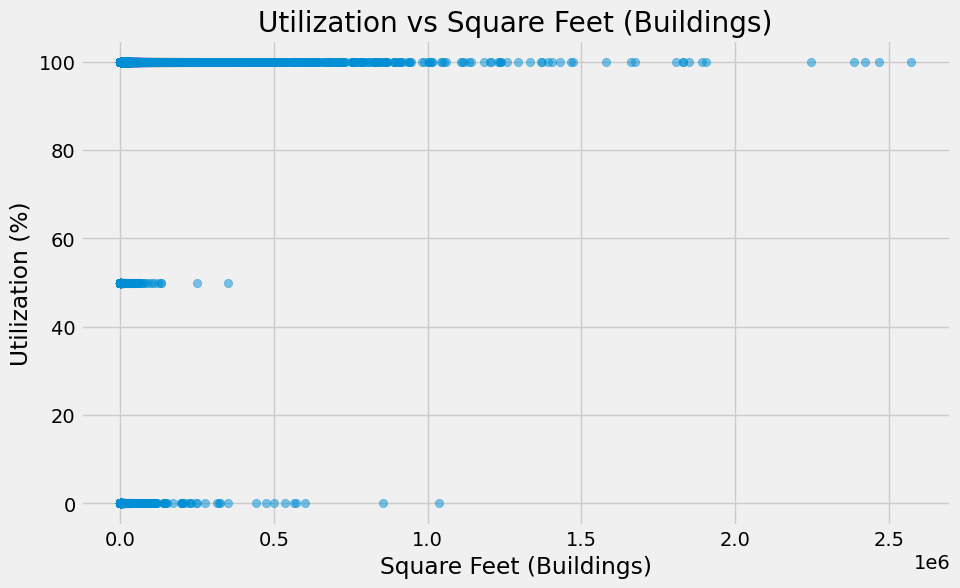

In [59]:
# Scatter plot of Utilization vs Square Feet (Buildings)
plt.figure(figsize=(10, 6))
plt.scatter(subset_data['Square Feet (Buildings)'], subset_data['Utilization'], alpha=0.5)
plt.title('Utilization vs Square Feet (Buildings)')
plt.xlabel('Square Feet (Buildings)')
plt.ylabel('Utilization (%)')
plt.grid(True)
plt.show()

The correlation coefficient between Square Feet (Buildings) and Utilization is approximately 0.012337. This value is very close to zero, indicating that there is virtually no linear relationship between the size of the buildings and their utilization percentage in the dataset. Proceeding to analyze how utilization changes over time for different buildings.

In [62]:
#Filter relevant columns  
filtered_data = subset_data[['Square Feet (Buildings)', 'Utilization', 'Fiscal Year']]

In [64]:
# Calculate occupancy rate as the actual utilized space
filtered_data['Occupancy Rate (Square Feet)'] = (filtered_data['Utilization'] / 100) * filtered_data['Square Feet (Buildings)']


In [66]:
# Display the filtered data with the new Occupancy Rate column
filtered_data.head()

,Square Feet (Buildings),Utilization,Fiscal Year,Occupancy Rate (Square Feet)
0,16750.0,100.0,2022,16750.0
1,22524.0,100.0,2022,22524.0
2,2175.0,100.0,2022,2175.0
3,7335.0,100.0,2022,7335.0
4,10400.0,100.0,2022,10400.0


In [72]:
# Ensure 'Fiscal Year' is numeric
filtered_data['Fiscal Year'] = pd.to_numeric(filtered_data['Fiscal Year'], errors='coerce')


In [74]:
# Convert 'Fiscal Year' to datetime, assuming the fiscal year starts on October 1st of the previous calendar year
filtered_data['Fiscal Year Start'] = pd.to_datetime(filtered_data['Fiscal Year'] - 1, format='%Y') + pd.DateOffset(months=9, days=1)


In [76]:
# Ensure 'Fiscal Year Start' is set as the index
filtered_data.set_index('Fiscal Year Start', inplace=True)


In [78]:
# Confirm that the index is a DatetimeIndex
print(filtered_data.index)


DatetimeIndex(['2021-10-02', '2021-10-02', '2021-10-02', '2021-10-02',
               '2021-10-02', '2021-10-02', '2021-10-02', '2021-10-02',
               '2021-10-02', '2021-10-02',
               ...
               '2022-10-02', '2022-10-02', '2022-10-02', '2022-10-02',
               '2022-10-02', '2022-10-02', '2022-10-02', '2022-10-02',
               '2022-10-02', '2022-10-02'],
              dtype='datetime64[ns]', name='Fiscal Year Start', length=614515, freq=None)


In [80]:
# Sort the data by this index to ensure it is in chronological order
filtered_data.sort_index(inplace=True)


In [82]:
# Display the first few rows to confirm the setup
filtered_data.head()


,Square Feet (Buildings),Utilization,Fiscal Year,Occupancy Rate (Square Feet)
Fiscal Year Start,,,,
2021-10-02,16750.0,100.0,2022,16750.0
2021-10-02,22524.0,100.0,2022,22524.0
2021-10-02,2175.0,100.0,2022,2175.0
2021-10-02,7335.0,100.0,2022,7335.0
2021-10-02,10400.0,100.0,2022,10400.0


### Aggregate the Data

In [85]:
# Aggregate the data by Fiscal Year
annual_data = filtered_data.resample('Y').agg({
    'Square Feet (Buildings)': 'sum',
    'Utilization': 'mean',
    'Occupancy Rate (Square Feet)': 'sum'
})



In [87]:
# Display the aggregated data
annual_data

,Square Feet (Buildings),Utilization,Occupancy Rate (Square Feet)
Fiscal Year Start,,,
2021-12-31,1.273468e+09,94.376806,6.840444e+08
2022-12-31,2.034902e+08,94.146061,3.168382e+07


### Create Line Chart

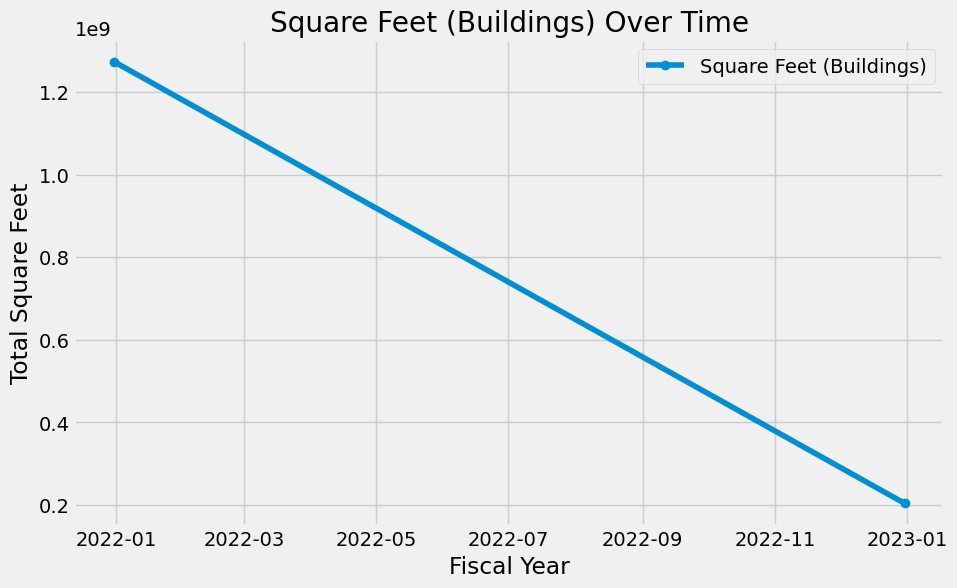

In [90]:
# Plotting Square Feet (Buildings) over time as a line chart
plt.figure(figsize=(10, 6))
plt.plot(annual_data.index, annual_data['Square Feet (Buildings)'], marker='o', linestyle='-', label='Square Feet (Buildings)')
plt.title('Square Feet (Buildings) Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Square Feet')
plt.grid(True)
plt.legend()
plt.show()

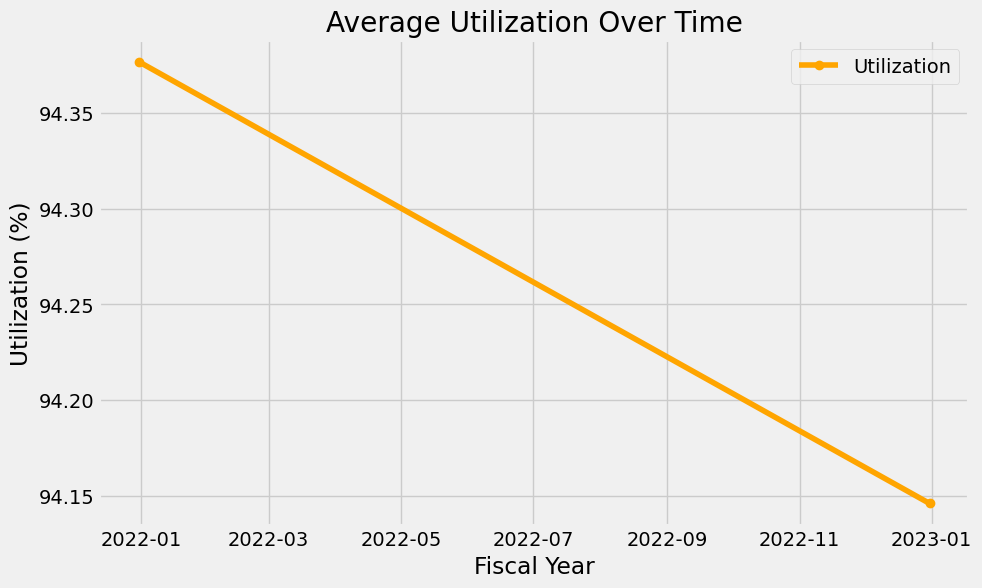

In [92]:
# Plotting Utilization over time as a line chart
plt.figure(figsize=(10, 6))
plt.plot(annual_data.index, annual_data['Utilization'], marker='o', linestyle='-', color='orange', label='Utilization')
plt.title('Average Utilization Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Utilization (%)')
plt.grid(True)
plt.legend()
plt.show()

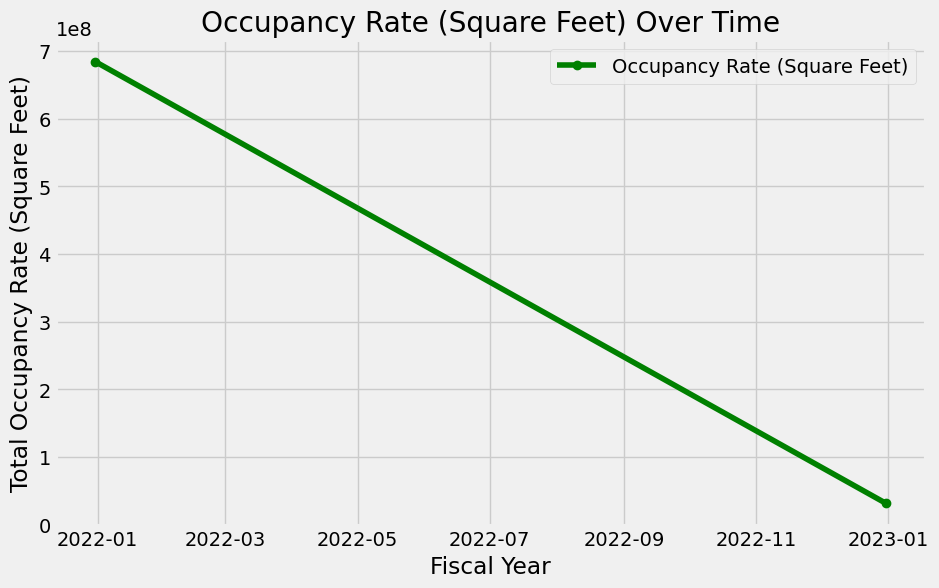

In [102]:
# Plotting Occupancy Rate (Square Feet) over time as a line chart
plt.figure(figsize=(10, 6))
plt.plot(annual_data.index, annual_data['Occupancy Rate (Square Feet)'], marker='o', linestyle='-', color='green', label='Occupancy Rate (Square Feet)')
plt.title('Occupancy Rate (Square Feet) Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Occupancy Rate (Square Feet)')
plt.grid(True)
plt.legend()
plt.show()

Analysis of line charts: Square Feet (Buildings) Over Time: The total square footage of buildings shows a consistent and significant decline throughout the fiscal year 2022.
Average Utilization Over Time: The average utilization percentage experiences a slight but steady decrease over the same period. 
Square Feet (Buildings) Over Time: The total square footage of buildings shows a consistent and significant decline throughout the fiscal year 2022.
Average Utilization Over Time: The average utilization percentage experiences a slight but steady decrease over the same period.

### Decompose the time series 

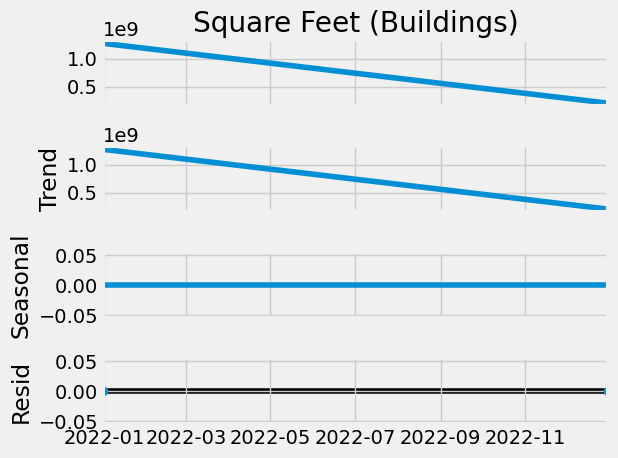

In [105]:
# Decompose the Square Feet (Buildings) time series
decomposition_sqft = sm.tsa.seasonal_decompose(annual_data['Square Feet (Buildings)'], model='additive', period=1)
decomposition_sqft.plot()
plt.show()

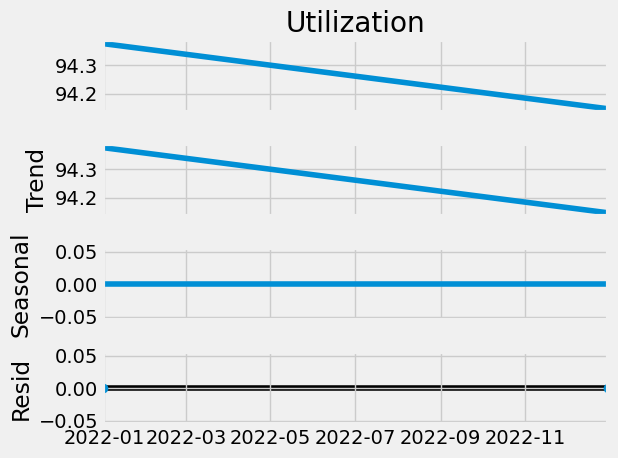

In [107]:
# Decompose the Utilization time series
decomposition_util = sm.tsa.seasonal_decompose(annual_data['Utilization'], model='additive', period=1)
decomposition_util.plot()
plt.show()

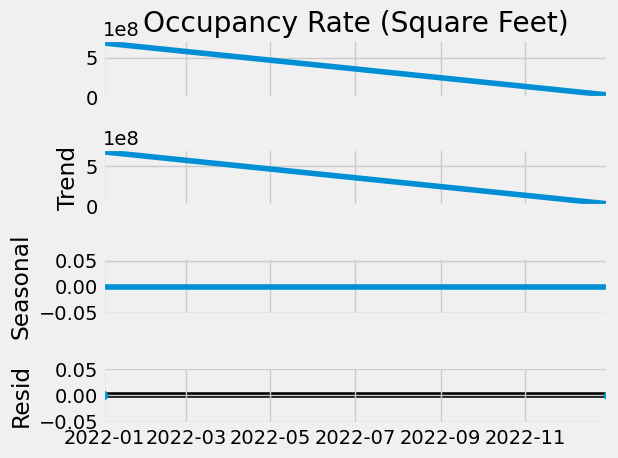

In [109]:
# Decompose the Occupancy Rate (Square Feet) time series
decomposition_occupancy = sm.tsa.seasonal_decompose(annual_data['Occupancy Rate (Square Feet)'], model='additive', period=1)
decomposition_occupancy.plot()
plt.show()

Analysis of the result is overall decline. The primary observation across all metrics is a consistent decline over the fiscal year 2022. The total square footage of buildings has decreased significantly, which is accompanied by a small decline in both utilization percentage and occupancy rate. This could suggest a downsizing of the portfolio, a focus on reducing underutilized space, or other strategic decisions impacting the space available.



### Check for Stationarity

Since I am working with annual data and possibly have only two data points (for the years 2022 and 2023), the test does not have enough data points to run the Dickey-Fuller test. Unfortunately, I do not have more granular data to use for the time series. 

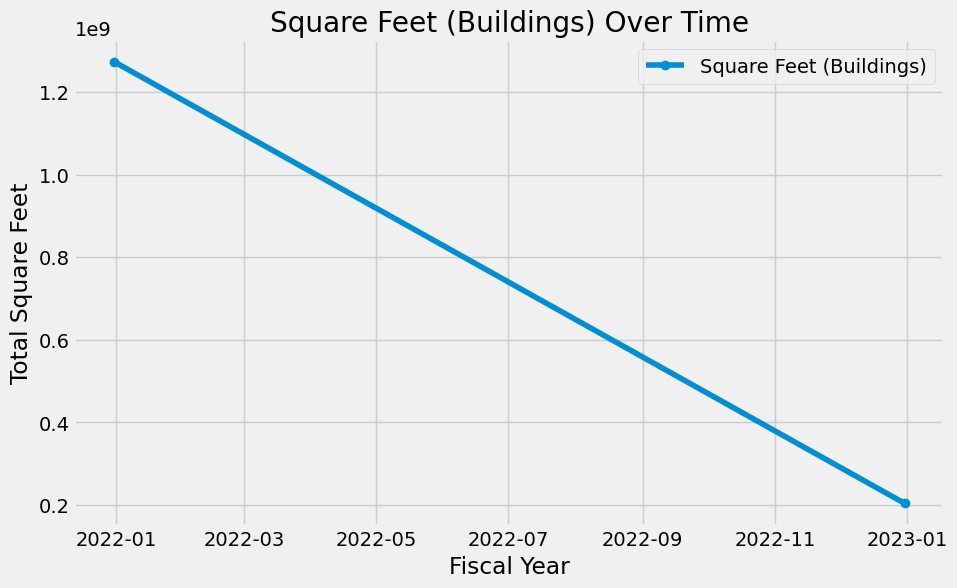

In [122]:
# Plot the original time series data
plt.figure(figsize=(10, 6))
plt.plot(annual_data.index, annual_data['Square Feet (Buildings)'], marker='o', linestyle='-', label='Square Feet (Buildings)')
plt.title('Square Feet (Buildings) Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Square Feet')
plt.grid(True)
plt.legend()
plt.show()

### Analyze Autocorrelations 

Given the very limited number of data points, analyzing autocorrelations would not be meaningful in this context.